In [115]:
import tensorflow as tf
import erum_data_data as edd #import the erum_data_data module
import numpy as np
import matplotlib.pyplot as plt

In [52]:
def reshape_ds(arr1, arr2):
    arr1 = arr1.reshape(arr1.shape[0], arr1.shape[1]*arr1.shape[2], 1)
    arr2 = arr2.reshape(arr2.shape[0], arr2.shape[1], 1)
    arr1 = np.concatenate((arr1, arr2), axis=1)
    return arr1

In [144]:
ds = 'top'
edd.print_description(ds)


Top tagging dataset.

Description:
14tev, hadronic tops for signal, qcd diets background, delphes ATLAS detector card with pythia. No MPI/pile-up included
Particle-flow entries (produced by Delphes E-flow) have been clustered into anti-kT 0.8 jets in the pT range [550,650].
All top jets are matched to a parton-level top within ∆R = 0.8, and to all top decay partons within 0.8. Also,|eta|_jet < 2 has been required.

Ref: 
Deep-learned Top Tagging with a Lorentz Layer by A Butter, G Kasieczka, T and M Russell (arXiv: 1707.08966)

Dataset shape:
~2M events have been stored divided between training (70%) and test (30%) and the shape of the dataset is (# of events, 200, 4).
The feature represent the leading 200 jet constituent four-momenta, with zero-padding for jets that have less than 200.
Constituents are sorted by pT, with the highest pT one first.
The set label are 0 for QCD and 1 for top.



In [137]:
# loading training data into RAM (downloads dataset first time)

X_train, y_train  = edd.load(ds, dataset='train', cache_dir = './'+ ds, cache_subdir = 'datasets')
X_test, y_test = edd.load(ds, dataset='test', cache_dir = './'+ ds, cache_subdir = 'datasets')

In [138]:
if ds == 'airshower':
    x_train = reshape_ds(X_train[0], X_train[1])
else:
    x_train = X_train[0]

In [139]:
dim1 = x_train.shape[1]
dim2 = x_train.shape[2]
print ((dim1, dim2))

(200, 4)


In [140]:
#split dataset
train_frac = 0.7

ds_train = x_train[:int(len(x_train)*train_frac)], y_train[:int(len(x_train)*train_frac)]
ds_val   = x_train[int(len(x_train)*train_frac):], y_train[int(len(x_train)*train_frac):]
print ( (len(x_train),len(ds_train[0]), len(ds_val[0])))

(1412516, 988761, 423755)


In [141]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(dim1, dim2)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(1, activation = 'sigmoid')
])
print(model.summary())
model.compile(
    optimizer=tf.keras.optimizers.SGD(0.001),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.BinaryAccuracy(name = "acc")]#, tf.keras.metrics.AUC(name = "AUC")],
)

history = model.fit(
                    x = tf.keras.utils.normalize(ds_train[0], axis = 1), y = ds_train[1],
                    epochs=30,
                    batch_size = 300,
                    validation_data=ds_val,
                )

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_32 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_96 (Dense)             (None, 128)               102528    
_________________________________________________________________
dense_97 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_98 (Dense)             (None, 1)                 129       
Total params: 119,169
Trainable params: 119,169
Non-trainable params: 0
_________________________________________________________________
None
Train on 988761 samples, validate on 423755 samples
Epoch 1/30
988761/988761 [==============================] - 38s 38us/sample - loss: 0.6915 - acc: 0.5317 - val_loss: 5.9529 - val_acc: 0.5319
Epoch 2/30
988761/988761 [====================

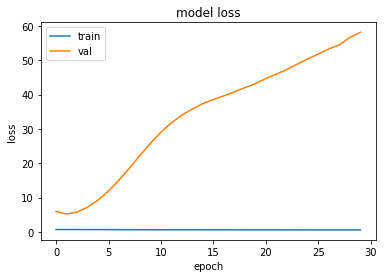

In [142]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()



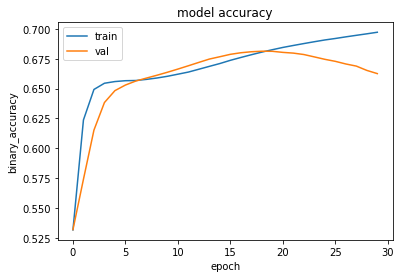

In [143]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('binary_accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()